# Import

In [12]:
# Imports generales
import antropy as ant
import pandas as pd
import io
import numpy as np
import time
import datetime

In [23]:
# Subir el conjunto de datos
data = pd.read_csv(r'D:/Documentos/Master_BigData/14-TFM/DatosTFM/Manifestaciones/Data_noaltarifazo.csv')

In [24]:
# Subir el segundo conjunto de datos
data2 = pd.read_csv(r'D:/Documentos/Master_BigData/14-TFM/DatosTFM/Manifestaciones/Data_9n.csv')

# Primer Data set

In [25]:
#Observar el numero de hashtags unicos
uniqueValues_h1 = data['hashtag'].nunique()
print(uniqueValues_h1)

23398


In [26]:
#Observar el numero usuarios unicos
uniqueValues_u1 = data['user'].nunique()
print(uniqueValues_u1)

9670


In [27]:
#Cambiar la columna hour, ya que al muliplicar sus valores por 3600, las horas se encuentran en Unix Timestamp
data['hour'] = data['hour']*3600 
data['hour'] = pd.to_datetime(data["hour"], unit="s")

In [28]:
data.head()

,user,hashtag,hour
0,3393789761,6273,2019-01-01 03:00:00
1,3393789761,17658,2019-01-01 03:00:00
2,3393789761,17216,2019-01-01 03:00:00
3,173214382,6257,2019-01-01 03:00:00
4,173214382,6270,2019-01-01 03:00:00


In [29]:
#Observar las horas unicas y su cantidad
print(data['hour'].unique())
print(data['hour'].nunique())

['2019-01-01T03:00:00.000000000' '2019-01-01T04:00:00.000000000'
 '2019-01-01T05:00:00.000000000' '2019-01-01T06:00:00.000000000'
 '2019-01-01T07:00:00.000000000' '2019-01-01T08:00:00.000000000'
 '2019-01-01T09:00:00.000000000' '2019-01-01T10:00:00.000000000'
 '2019-01-01T11:00:00.000000000' '2019-01-01T12:00:00.000000000'
 '2019-01-01T13:00:00.000000000' '2019-01-01T14:00:00.000000000'
 '2019-01-01T15:00:00.000000000' '2019-01-01T16:00:00.000000000'
 '2019-01-01T17:00:00.000000000' '2019-01-01T18:00:00.000000000'
 '2019-01-01T19:00:00.000000000' '2019-01-01T20:00:00.000000000'
 '2019-01-01T21:00:00.000000000' '2019-01-01T22:00:00.000000000'
 '2019-01-01T23:00:00.000000000' '2019-01-02T00:00:00.000000000'
 '2019-01-02T01:00:00.000000000' '2019-01-02T02:00:00.000000000'
 '2019-01-02T03:00:00.000000000' '2019-01-02T04:00:00.000000000'
 '2019-01-02T05:00:00.000000000' '2019-01-02T06:00:00.000000000'
 '2019-01-02T07:00:00.000000000' '2019-01-02T08:00:00.000000000'
 '2019-01-02T09:00:00.000

In [43]:
data.to_csv('noaltarifazoV2.csv')

In [30]:
data_ts = data
data_ts.head()

,user,hashtag,hour
0,3393789761,6273,2019-01-01 03:00:00
1,3393789761,17658,2019-01-01 03:00:00
2,3393789761,17216,2019-01-01 03:00:00
3,173214382,6257,2019-01-01 03:00:00
4,173214382,6270,2019-01-01 03:00:00


In [31]:
data_ts['hour'] = data_ts.hour.values.astype(np.int64) // 10 ** 9

In [32]:
data_ts.head()

,user,hashtag,hour
0,3393789761,6273,1546311600
1,3393789761,17658,1546311600
2,3393789761,17216,1546311600
3,173214382,6257,1546311600
4,173214382,6270,1546311600


In [33]:
data_ts.to_csv('noaltarifazoV3.csv')

## Entropia Shannon Base 2

### Hashtag por hora

In [44]:
from scipy.stats import entropy
#Usando group_by se saca el porcentaje de cada hashtag segun la hora del data set y el resultado se guarda en un nuevo data set

Probab_hashtag = (data.groupby(["hour"])['hashtag'].value_counts(normalize=True)).reset_index(name='probab#_hour')
#Probab_hashtag.groupby('hour')['probab#_hour'].apply(list).reset_index(name='probab#_hour')
print(Probab_hashtag)

                     hour  hashtag  probab#_hour
0     2019-01-01 03:00:00     6257      0.205394
1     2019-01-01 03:00:00     6270      0.064315
2     2019-01-01 03:00:00    17658      0.026971
3     2019-01-01 03:00:00     7511      0.018672
4     2019-01-01 03:00:00    17216      0.018672
...                   ...      ...           ...
75913 2019-01-11 22:00:00    23018      0.001786
75914 2019-01-11 22:00:00    23068      0.001786
75915 2019-01-11 22:00:00    23127      0.001786
75916 2019-01-11 22:00:00    23269      0.001786
75917 2019-01-11 22:00:00    23273      0.001786

[75918 rows x 3 columns]


In [45]:
Probab_hashtag.loc[(Probab_hashtag['hour'] == '2019-01-01 03:00:00')]

,hour,hashtag,probab#_hour
0,2019-01-01 03:00:00,6257,0.205394
1,2019-01-01 03:00:00,6270,0.064315
2,2019-01-01 03:00:00,17658,0.026971
3,2019-01-01 03:00:00,7511,0.018672
4,2019-01-01 03:00:00,17216,0.018672
...,...,...,...
244,2019-01-01 03:00:00,21998,0.002075
245,2019-01-01 03:00:00,22457,0.002075
246,2019-01-01 03:00:00,22622,0.002075
247,2019-01-01 03:00:00,22663,0.002075


In [46]:
from scipy.stats import entropy
EntropyShannon = (Probab_hashtag.groupby('hour').apply(lambda x: entropy(x['probab#_hour'],2))).reset_index(name='entropy')
print(EntropyShannon)
EntropyShannon.to_csv('EntropyShannon.csv')

                   hour   entropy
0   2019-01-01 03:00:00  0.949473
1   2019-01-01 04:00:00  0.653788
2   2019-01-01 05:00:00  0.502337
3   2019-01-01 06:00:00  0.321578
4   2019-01-01 07:00:00  0.244117
..                  ...       ...
255 2019-01-11 18:00:00  0.578615
256 2019-01-11 19:00:00  0.500151
257 2019-01-11 20:00:00  0.681650
258 2019-01-11 21:00:00  0.462699
259 2019-01-11 22:00:00  0.414707

[260 rows x 2 columns]


### Usuarios por hora

In [47]:
#Usando group_by se saca el porcentaje de cada usuario segun la hora del data set y el resultado se guarda en un nuevo data set

Probab_usuario = (data.groupby(["hour"])['user'].value_counts(normalize=True)).reset_index(name='probabUser_hour')
#Probab_usuario.groupby('hour')['probabUser_hour'].apply(list).reset_index(name='probabUser_hour')
print(Probab_usuario)

                     hour                 user  probabUser_hour
0     2019-01-01 03:00:00             75933424         0.029046
1     2019-01-01 03:00:00  1025052047257874432         0.016598
2     2019-01-01 03:00:00            498312626         0.014523
3     2019-01-01 03:00:00   833342984108273664         0.014523
4     2019-01-01 03:00:00            146961882         0.012448
...                   ...                  ...              ...
60833 2019-01-11 22:00:00  1051457737094324224         0.001786
60834 2019-01-11 22:00:00  1067431682423185410         0.001786
60835 2019-01-11 22:00:00  1071468867313197056         0.001786
60836 2019-01-11 22:00:00  1072584181752979457         0.001786
60837 2019-01-11 22:00:00  1083770335470776322         0.001786

[60838 rows x 3 columns]


In [48]:
Probab_usuario.loc[(Probab_usuario['hour'] == '2019-01-07 04:00:00')]

,hour,user,probabUser_hour
34852,2019-01-07 04:00:00,540277859,0.400000
34853,2019-01-07 04:00:00,2834447062,0.023333
34854,2019-01-07 04:00:00,124915167,0.016667
34855,2019-01-07 04:00:00,431641618,0.016667
34856,2019-01-07 04:00:00,889870691805388800,0.015000
...,...,...,...
35009,2019-01-07 04:00:00,1049015094611464192,0.001667
35010,2019-01-07 04:00:00,1064624917637926912,0.001667
35011,2019-01-07 04:00:00,1069972573079920641,0.001667
35012,2019-01-07 04:00:00,1077252128975085570,0.001667


In [49]:
EntropyShannon_user = (Probab_usuario.groupby('hour').apply(lambda x: entropy(x['probabUser_hour'],2))).reset_index(name='entropy')
print(EntropyShannon_user)
#EntropyShannon_user.to_csv('EntropyShannon_user.csv')

                   hour   entropy
0   2019-01-01 03:00:00  0.225942
1   2019-01-01 04:00:00  0.273823
2   2019-01-01 05:00:00  0.214094
3   2019-01-01 06:00:00  0.254511
4   2019-01-01 07:00:00  0.252966
..                  ...       ...
255 2019-01-11 18:00:00  0.467691
256 2019-01-11 19:00:00  0.727435
257 2019-01-11 20:00:00  0.796234
258 2019-01-11 21:00:00  0.386689
259 2019-01-11 22:00:00  0.337923

[260 rows x 2 columns]


### Hashtag segun usuarios por hora

In [50]:
#Usando group_by se saca el porcentaje de cada hashtag segun el usuario, en cada hora del data set y el resultado se guarda en un nuevo data set
Probab_user_hashtag = (data.groupby(["hour",'user'])['hashtag'].value_counts(normalize=True)).reset_index(name='probab_user_hashtag')
#Probab_hashtag.groupby('hour')['probab#_hour'].apply(list).reset_index(name='probab#_hour')
print(Probab_user_hashtag)

                      hour                 user  hashtag  probab_user_hashtag
0      2019-01-01 03:00:00             14335104     3994             0.333333
1      2019-01-01 03:00:00             14335104    12535             0.333333
2      2019-01-01 03:00:00             14335104    17496             0.333333
3      2019-01-01 03:00:00             33076490     7511             1.000000
4      2019-01-01 03:00:00             37635136    12024             1.000000
...                    ...                  ...      ...                  ...
136428 2019-01-11 22:00:00  1083565760558100480    11940             0.142857
136429 2019-01-11 22:00:00  1083565760558100480    12601             0.142857
136430 2019-01-11 22:00:00  1083565760558100480    17024             0.142857
136431 2019-01-11 22:00:00  1083565760558100480    17654             0.142857
136432 2019-01-11 22:00:00  1083770335470776322    17326             1.000000

[136433 rows x 4 columns]


In [51]:
EntropyShannon_user_hashtag = (Probab_user_hashtag.groupby('hour').apply(lambda x: entropy(x['probab_user_hashtag'],2))).reset_index(name='entropy')
print(EntropyShannon_user_hashtag)
EntropyShannon_user_hashtag.to_csv('EntropyShannon_user_hashtag.csv')

                   hour   entropy
0   2019-01-01 03:00:00  0.190243
1   2019-01-01 04:00:00  0.164639
2   2019-01-01 05:00:00  0.190602
3   2019-01-01 06:00:00  0.188998
4   2019-01-01 07:00:00  0.230569
..                  ...       ...
255 2019-01-11 18:00:00  0.300215
256 2019-01-11 19:00:00  0.369846
257 2019-01-11 20:00:00  0.282748
258 2019-01-11 21:00:00  0.304351
259 2019-01-11 22:00:00  0.238974

[260 rows x 2 columns]


### Usuarios segun hashtag por hora

In [52]:
#Usando group_by se saca el porcentaje de cada hashtag segun el usuario, en cada hora del data set y el resultado se guarda en un nuevo data set
Probab_hashtag_user = (data.groupby(["hour",'hashtag'])['user'].value_counts(normalize=True)).reset_index(name='probab_hashtag_user')
#Probab_hashtag.groupby('hour')['probab#_hour'].apply(list).reset_index(name='probab#_hour')
print(Probab_hashtag_user)

                      hour  hashtag                 user  probab_hashtag_user
0      2019-01-01 03:00:00      158   833342984108273664             1.000000
1      2019-01-01 03:00:00      163  1018627305349009410             1.000000
2      2019-01-01 03:00:00      176   833342984108273664             1.000000
3      2019-01-01 03:00:00      181   727940467040653314             0.500000
4      2019-01-01 03:00:00      181   833342984108273664             0.500000
...                    ...      ...                  ...                  ...
136428 2019-01-11 22:00:00    23127           2493100361             1.000000
136429 2019-01-11 22:00:00    23269            416737865             1.000000
136430 2019-01-11 22:00:00    23273            863495503             1.000000
136431 2019-01-11 22:00:00    23276           1349778409             0.666667
136432 2019-01-11 22:00:00    23276            469662752             0.333333

[136433 rows x 4 columns]


In [53]:
EntropyShannon_hashtag_user = (Probab_hashtag_user.groupby('hour').apply(lambda x: entropy(x['probab_hashtag_user'],2))).reset_index(name='entropy')
print(EntropyShannon_hashtag_user)
EntropyShannon_hashtag_user.to_csv('EntropyShannon_hashtag_user.csv')

                   hour   entropy
0   2019-01-01 03:00:00  0.414238
1   2019-01-01 04:00:00  0.296046
2   2019-01-01 05:00:00  0.247964
3   2019-01-01 06:00:00  0.172435
4   2019-01-01 07:00:00  0.148219
..                  ...       ...
255 2019-01-11 18:00:00  0.318251
256 2019-01-11 19:00:00  0.258774
257 2019-01-11 20:00:00  0.328496
258 2019-01-11 21:00:00  0.262527
259 2019-01-11 22:00:00  0.256955

[260 rows x 2 columns]


## Entropia Shannon Base Natural

### Hashtag por hora

In [54]:
from scipy.stats import entropy
EntropyShannonNatural = (Probab_hashtag.groupby('hour').apply(lambda x: entropy(x['probab#_hour']))).reset_index(name='entropy')
print(EntropyShannonNatural)
EntropyShannonNatural.to_csv('EntropyShannonNatural.csv')

                   hour   entropy
0   2019-01-01 03:00:00  4.567980
1   2019-01-01 04:00:00  4.654480
2   2019-01-01 05:00:00  4.679446
3   2019-01-01 06:00:00  4.396920
4   2019-01-01 07:00:00  4.018563
..                  ...       ...
255 2019-01-11 18:00:00  5.599330
256 2019-01-11 19:00:00  5.648317
257 2019-01-11 20:00:00  5.317287
258 2019-01-11 21:00:00  5.461557
259 2019-01-11 22:00:00  5.321865

[260 rows x 2 columns]


### Usuarios por hora

In [55]:
EntropyShannonNatural_user = (Probab_usuario.groupby('hour').apply(lambda x: entropy(x['probabUser_hour']))).reset_index(name='entropy')
print(EntropyShannonNatural_user)
EntropyShannonNatural_user.to_csv('EntropyShannonNatural_user.csv')

                   hour   entropy
0   2019-01-01 03:00:00  5.216476
1   2019-01-01 04:00:00  4.962619
2   2019-01-01 05:00:00  4.727548
3   2019-01-01 06:00:00  4.199836
4   2019-01-01 07:00:00  3.575675
..                  ...       ...
255 2019-01-11 18:00:00  5.316134
256 2019-01-11 19:00:00  4.896582
257 2019-01-11 20:00:00  4.877089
258 2019-01-11 21:00:00  5.130764
259 2019-01-11 22:00:00  5.113116

[260 rows x 2 columns]


### Hashtag segun usuarios por hora

In [56]:
EntropyShannonNatural_user_hashtag = (Probab_user_hashtag.groupby('hour').apply(lambda x: entropy(x['probab_user_hashtag']))).reset_index(name='entropy')
print(EntropyShannonNatural_user_hashtag)
EntropyShannonNatural_user_hashtag.to_csv('EntropyShannonNatural_user_hashtag.csv')

                   hour   entropy
0   2019-01-01 03:00:00  5.927855
1   2019-01-01 04:00:00  5.613013
2   2019-01-01 05:00:00  5.404109
3   2019-01-01 06:00:00  4.854427
4   2019-01-01 07:00:00  4.302030
..                  ...       ...
255 2019-01-11 18:00:00  6.428413
256 2019-01-11 19:00:00  6.221828
257 2019-01-11 20:00:00  6.304802
258 2019-01-11 21:00:00  6.134999
259 2019-01-11 22:00:00  5.971626

[260 rows x 2 columns]


### Usuarios segun hashtag por hora

In [57]:
EntropyShannonNatural_hashtag_user = (Probab_hashtag_user.groupby('hour').apply(lambda x: entropy(x['probab_hashtag_user']))).reset_index(name='entropy')
print(EntropyShannonNatural_hashtag_user)
EntropyShannonNatural_hashtag_user.to_csv('EntropyShannonNatural_hashtag_user.csv')

                   hour   entropy
0   2019-01-01 03:00:00  5.703860
1   2019-01-01 04:00:00  5.481606
2   2019-01-01 05:00:00  5.346748
3   2019-01-01 06:00:00  4.870990
4   2019-01-01 07:00:00  4.384380
..                  ...       ...
255 2019-01-11 18:00:00  6.410378
256 2019-01-11 19:00:00  6.332899
257 2019-01-11 20:00:00  6.259054
258 2019-01-11 21:00:00  6.176824
259 2019-01-11 22:00:00  5.953645

[260 rows x 2 columns]


## Permutation Entropy

In [58]:
PermutationEntropy = (Probab_hashtag.groupby('hour').apply(lambda x: ant.perm_entropy(x['probab#_hour'],normalize=True))).reset_index(name='perm_entropy')
print(PermutationEntropy)
PermutationEntropy.to_csv('PermutationEntropy.csv')

                   hour  perm_entropy
0   2019-01-01 03:00:00      0.164570
1   2019-01-01 04:00:00      0.194096
2   2019-01-01 05:00:00      0.179924
3   2019-01-01 06:00:00      0.189391
4   2019-01-01 07:00:00      0.213973
..                  ...           ...
255 2019-01-11 18:00:00      0.160965
256 2019-01-11 19:00:00      0.143700
257 2019-01-11 20:00:00      0.198681
258 2019-01-11 21:00:00      0.161542
259 2019-01-11 22:00:00      0.178747

[260 rows x 2 columns]


## Spectral Entropy

### Hashtag por hora

In [59]:
SpectralEntropy = (Probab_hashtag.groupby('hour').apply(lambda x: ant.spectral_entropy(x['probab#_hour'],sf=100,method='welch',normalize=True))).reset_index(name='spectral_entropy')
print(SpectralEntropy)
SpectralEntropy.to_csv('SpectralEntropy.csv')

                   hour  spectral_entropy
0   2019-01-01 03:00:00          0.144992
1   2019-01-01 04:00:00          0.164793
2   2019-01-01 05:00:00          0.158285
3   2019-01-01 06:00:00          0.206694
4   2019-01-01 07:00:00          0.211534
..                  ...               ...
255 2019-01-11 18:00:00          0.199357
256 2019-01-11 19:00:00          0.203617
257 2019-01-11 20:00:00          0.179299
258 2019-01-11 21:00:00          0.212054
259 2019-01-11 22:00:00          0.196015

[260 rows x 2 columns]


c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 249, using nperseg = 249
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 202, using nperseg = 202
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 178, using nperseg = 178
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 112, using nperseg = 112
  warnings.warn(

### Usuarios por hora 

In [60]:
SpectralEntropy_user = (Probab_usuario.groupby('hour').apply(lambda x: ant.spectral_entropy(x['probabUser_hour'],sf=100,method='welch',normalize=True))).reset_index(name='spectral_entropy')
print(SpectralEntropy_user)
SpectralEntropy_user.to_csv('SpectralEntropy_user.csv')

                   hour  spectral_entropy
0   2019-01-01 03:00:00          0.281285
1   2019-01-01 04:00:00          0.290801
2   2019-01-01 05:00:00          0.315759
3   2019-01-01 06:00:00          0.318847
4   2019-01-01 07:00:00          0.351187
..                  ...               ...
255 2019-01-11 18:00:00          0.205524
256 2019-01-11 19:00:00          0.187170
257 2019-01-11 20:00:00          0.192847
258 2019-01-11 21:00:00          0.221838
259 2019-01-11 22:00:00          0.237067

[260 rows x 2 columns]


c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 231, using nperseg = 231
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 188, using nperseg = 188
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 140, using nperseg = 140
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 86, using nperseg = 86
  warnings.warn('n

### Hashtag segun usuarios por hora

In [61]:
SpectralEntropy_user_hashtag = (Probab_user_hashtag.groupby('hour').apply(lambda x: ant.spectral_entropy(x['probab_user_hashtag'],sf=100,method='welch',normalize=True))).reset_index(name='spectral_entropy')
print(SpectralEntropy_user_hashtag)
SpectralEntropy_user_hashtag.to_csv('SpectralEntropy_user_hashtag.csv')

c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 155, using nperseg = 155
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 93, using nperseg = 93
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 55, using nperseg = 55
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 40, using nperseg = 40
  warnings.warn('npers

                   hour  spectral_entropy
0   2019-01-01 03:00:00          0.909133
1   2019-01-01 04:00:00          0.860793
2   2019-01-01 05:00:00          0.859124
3   2019-01-01 06:00:00          0.847751
4   2019-01-01 07:00:00          0.781705
..                  ...               ...
255 2019-01-11 18:00:00          0.928205
256 2019-01-11 19:00:00          0.894675
257 2019-01-11 20:00:00          0.904847
258 2019-01-11 21:00:00          0.902439
259 2019-01-11 22:00:00          0.877522

[260 rows x 2 columns]


c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 164, using nperseg = 164
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 67, using nperseg = 67
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 82, using nperseg = 82
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 96, using nperseg = 96
  warnings.warn('npers

### Usuarios segun hashtag por hora

In [62]:
SpectralEntropy_hashtag_user = (Probab_hashtag_user.groupby('hour').apply(lambda x: ant.spectral_entropy(x['probab_hashtag_user'],sf=100,method='welch',normalize=True))).reset_index(name='spectral_entropy')
print(SpectralEntropy_hashtag_user)
SpectralEntropy_hashtag_user.to_csv('SpectralEntropy_hashtag_user.csv')

c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 155, using nperseg = 155
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 93, using nperseg = 93
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 55, using nperseg = 55
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 40, using nperseg = 40
  warnings.warn('npers

                   hour  spectral_entropy
0   2019-01-01 03:00:00          0.611443
1   2019-01-01 04:00:00          0.563796
2   2019-01-01 05:00:00          0.687134
3   2019-01-01 06:00:00          0.752386
4   2019-01-01 07:00:00          0.729369
..                  ...               ...
255 2019-01-11 18:00:00          0.771715
256 2019-01-11 19:00:00          0.782599
257 2019-01-11 20:00:00          0.807970
258 2019-01-11 21:00:00          0.804552
259 2019-01-11 22:00:00          0.787352

[260 rows x 2 columns]


c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 118, using nperseg = 118
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 235, using nperseg = 235
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 53, using nperseg = 53
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 159, using nperseg = 159
  warnings.warn('n

## Singular value decomposition entropy

In [63]:
SVD_Entropy = (Probab_hashtag.groupby('hour').apply(lambda x: ant.svd_entropy(x['probab#_hour'],normalize=True))).reset_index(name='SVD_Entropy')
print(SVD_Entropy)
SVD_Entropy.to_csv('SVD_Entropy.csv')

                   hour  SVD_Entropy
0   2019-01-01 03:00:00     0.493783
1   2019-01-01 04:00:00     0.561739
2   2019-01-01 05:00:00     0.498707
3   2019-01-01 06:00:00     0.505174
4   2019-01-01 07:00:00     0.561363
..                  ...          ...
255 2019-01-11 18:00:00     0.361973
256 2019-01-11 19:00:00     0.297570
257 2019-01-11 20:00:00     0.344979
258 2019-01-11 21:00:00     0.338555
259 2019-01-11 22:00:00     0.311636

[260 rows x 2 columns]


# Segundo Data set

In [64]:
#Observar el numero de hashtags unicos
uniqueValues_h2 = data2['hashtag'].nunique()
print(uniqueValues_h2)

18717


In [65]:
#Observar el numero usuarios unicos
uniqueValues_u2 = data2['user'].nunique()
print(uniqueValues_u2)

8022


In [66]:
#Cambiar la columna hour, ya que al muliplicar sus valores por 3600, las horas se encuentran en Unix Timestamp
data2['hour'] = data2['hour']*3600 
data2['hour'] = pd.to_datetime(data2["hour"], unit="s")

In [67]:
data2.head()

,user,hashtag,hour
0,833345897689968643,9658,2019-11-07 15:00:00
1,1126491136061784066,12517,2019-11-07 15:00:00
2,1178372545386557440,15026,2019-11-07 15:00:00
3,1185298652669104131,375,2019-11-07 15:00:00
4,853069081678839808,8144,2019-11-07 15:00:00


In [68]:
#Observar las horas unicas y su cantidad
print(data2['hour'].unique())
print(data2['hour'].nunique())

['2019-11-07T15:00:00.000000000' '2019-11-07T16:00:00.000000000'
 '2019-11-07T17:00:00.000000000' '2019-11-07T18:00:00.000000000'
 '2019-11-07T19:00:00.000000000' '2019-11-07T20:00:00.000000000'
 '2019-11-07T21:00:00.000000000' '2019-11-07T22:00:00.000000000'
 '2019-11-07T23:00:00.000000000' '2019-11-08T00:00:00.000000000'
 '2019-11-08T01:00:00.000000000' '2019-11-08T02:00:00.000000000'
 '2019-11-08T03:00:00.000000000' '2019-11-08T04:00:00.000000000'
 '2019-11-08T05:00:00.000000000' '2019-11-08T06:00:00.000000000'
 '2019-11-08T07:00:00.000000000' '2019-11-08T08:00:00.000000000'
 '2019-11-08T09:00:00.000000000' '2019-11-08T10:00:00.000000000'
 '2019-11-08T11:00:00.000000000' '2019-11-08T12:00:00.000000000'
 '2019-11-08T13:00:00.000000000' '2019-11-08T14:00:00.000000000'
 '2019-11-08T15:00:00.000000000' '2019-11-08T16:00:00.000000000'
 '2019-11-08T17:00:00.000000000' '2019-11-08T18:00:00.000000000'
 '2019-11-08T19:00:00.000000000' '2019-11-08T20:00:00.000000000'
 '2019-11-08T21:00:00.000

In [69]:
data2.to_csv('9nV2.csv')

## Entropia Shannon Base 2

### Hashtag por hora

In [70]:
from scipy.stats import entropy
#Usando group_by se saca el porcentaje de cada hashtag segun la hora del data set y el resultado se guarda en un nuevo data set

Probab_hashtag9n = (data2.groupby(["hour"])['hashtag'].value_counts(normalize=True)).reset_index(name='probab#_hour')
#Probab_hashtag.groupby('hour')['probab#_hour'].apply(list).reset_index(name='probab#_hour')
print(Probab_hashtag9n)

                     hour  hashtag  probab#_hour
0     2019-11-07 15:00:00      375      0.125000
1     2019-11-07 15:00:00     2235      0.125000
2     2019-11-07 15:00:00     1489      0.083333
3     2019-11-07 15:00:00     1995      0.083333
4     2019-11-07 15:00:00     9658      0.083333
...                   ...      ...           ...
59265 2019-11-11 15:00:00    18636      0.000491
59266 2019-11-11 15:00:00    18642      0.000491
59267 2019-11-11 15:00:00    18694      0.000491
59268 2019-11-11 15:00:00    18696      0.000491
59269 2019-11-11 15:00:00    18697      0.000491

[59270 rows x 3 columns]


In [71]:
from scipy.stats import entropy
EntropyShannon9n = (Probab_hashtag9n.groupby('hour').apply(lambda x: entropy(x['probab#_hour'],2))).reset_index(name='entropy')
print(EntropyShannon9n)
#EntropyShannon9n.to_csv('EntropyShannon9n.csv')

                  hour   entropy
0  2019-11-07 15:00:00  0.103099
1  2019-11-07 16:00:00  1.047230
2  2019-11-07 17:00:00  1.154644
3  2019-11-07 18:00:00  1.156747
4  2019-11-07 19:00:00  1.126914
..                 ...       ...
92 2019-11-11 11:00:00  1.217351
93 2019-11-11 12:00:00  1.256863
94 2019-11-11 13:00:00  1.348595
95 2019-11-11 14:00:00  1.390339
96 2019-11-11 15:00:00  1.126470

[97 rows x 2 columns]


### Usuarios por hora

In [72]:
#Usando group_by se saca el porcentaje de cada usuario segun la hora del data set y el resultado se guarda en un nuevo data set

Probab_usuario9n = (data2.groupby(["hour"])['user'].value_counts(normalize=True)).reset_index(name='probabUser_hour')
#Probab_usuario.groupby('hour')['probabUser_hour'].apply(list).reset_index(name='probabUser_hour')
print(Probab_usuario9n)

                     hour                 user  probabUser_hour
0     2019-11-07 15:00:00  1185298652669104131         0.125000
1     2019-11-07 15:00:00           1597329390         0.083333
2     2019-11-07 15:00:00           2421956984         0.083333
3     2019-11-07 15:00:00           2493221430         0.083333
4     2019-11-07 15:00:00   833345897689968643         0.083333
...                   ...                  ...              ...
70064 2019-11-11 15:00:00  1188858125518065665         0.000491
70065 2019-11-11 15:00:00  1189657324509650945         0.000491
70066 2019-11-11 15:00:00  1189921088794497026         0.000491
70067 2019-11-11 15:00:00  1190053408989941760         0.000491
70068 2019-11-11 15:00:00  1191109145769975814         0.000491

[70069 rows x 3 columns]


In [73]:
EntropyShannon_user9n = (Probab_usuario9n.groupby('hour').apply(lambda x: entropy(x['probabUser_hour'],2))).reset_index(name='entropy')
print(EntropyShannon_user9n)
EntropyShannon_user9n.to_csv('EntropyShannon_user9n.csv')

                  hour   entropy
0  2019-11-07 15:00:00  0.080694
1  2019-11-07 16:00:00  0.374256
2  2019-11-07 17:00:00  0.460030
3  2019-11-07 18:00:00  0.302163
4  2019-11-07 19:00:00  0.334108
..                 ...       ...
92 2019-11-11 11:00:00  0.685556
93 2019-11-11 12:00:00  0.416334
94 2019-11-11 13:00:00  0.434156
95 2019-11-11 14:00:00  0.368036
96 2019-11-11 15:00:00  0.463340

[97 rows x 2 columns]


### Hashtag segun usuarios por hora

In [74]:
#Usando group_by se saca el porcentaje de cada hashtag segun el usuario, en cada hora del data set y el resultado se guarda en un nuevo data set
Probab_user_hashtag9n = (data2.groupby(["hour",'user'])['hashtag'].value_counts(normalize=True)).reset_index(name='probab_user_hashtag')
#Probab_hashtag.groupby('hour')['probab#_hour'].apply(list).reset_index(name='probab#_hour')
print(Probab_user_hashtag9n)

                      hour                 user  hashtag  probab_user_hashtag
0      2019-11-07 15:00:00            139272363    13577             1.000000
1      2019-11-07 15:00:00            145726353     1995             1.000000
2      2019-11-07 15:00:00            190697412     6900             1.000000
3      2019-11-07 15:00:00            245966315     2235             1.000000
4      2019-11-07 15:00:00            530817781     1995             1.000000
...                    ...                  ...      ...                  ...
219483 2019-11-11 15:00:00  1192148773218246657     4443             0.142857
219484 2019-11-11 15:00:00  1192148773218246657     7250             0.142857
219485 2019-11-11 15:00:00  1192148773218246657    10026             0.142857
219486 2019-11-11 15:00:00  1192148773218246657    10517             0.142857
219487 2019-11-11 15:00:00  1192148773218246657    13401             0.142857

[219488 rows x 4 columns]


In [75]:
EntropyShannon_user_hashtag9n = (Probab_user_hashtag9n.groupby('hour').apply(lambda x: entropy(x['probab_user_hashtag'],2))).reset_index(name='entropy')
print(EntropyShannon_user_hashtag9n)
EntropyShannon_user_hashtag9n.to_csv('EntropyShannon_user_hashtag9n.csv')

                  hour   entropy
0  2019-11-07 15:00:00  0.038626
1  2019-11-07 16:00:00  0.269211
2  2019-11-07 17:00:00  0.293217
3  2019-11-07 18:00:00  0.240748
4  2019-11-07 19:00:00  0.255652
..                 ...       ...
92 2019-11-11 11:00:00  0.402438
93 2019-11-11 12:00:00  0.341387
94 2019-11-11 13:00:00  0.336600
95 2019-11-11 14:00:00  0.303669
96 2019-11-11 15:00:00  0.344409

[97 rows x 2 columns]


### Usuarios segun hashtag por hora

In [76]:
#Usando group_by se saca el porcentaje de cada hashtag segun el usuario, en cada hora del data set y el resultado se guarda en un nuevo data set
Probab_hashtag_user9n = (data2.groupby(["hour",'hashtag'])['user'].value_counts(normalize=True)).reset_index(name='probab_hashtag_user')
#Probab_hashtag.groupby('hour')['probab#_hour'].apply(list).reset_index(name='probab#_hour')
print(Probab_hashtag_user9n)

                      hour  hashtag                 user  probab_hashtag_user
0      2019-11-07 15:00:00      375  1185298652669104131                  1.0
1      2019-11-07 15:00:00      387           3229150299                  1.0
2      2019-11-07 15:00:00     1267           2421956984                  1.0
3      2019-11-07 15:00:00     1489           2468189521                  0.5
4      2019-11-07 15:00:00     1489           2493221430                  0.5
...                    ...      ...                  ...                  ...
219483 2019-11-11 15:00:00    18661  1038853535960584193                  0.2
219484 2019-11-11 15:00:00    18674   988639865666441216                  1.0
219485 2019-11-11 15:00:00    18694   988639865666441216                  1.0
219486 2019-11-11 15:00:00    18696   988639865666441216                  1.0
219487 2019-11-11 15:00:00    18697   988639865666441216                  1.0

[219488 rows x 4 columns]


In [77]:
EntropyShannon_hashtag_user9n = (Probab_hashtag_user9n.groupby('hour').apply(lambda x: entropy(x['probab_hashtag_user'],2))).reset_index(name='entropy')
print(EntropyShannon_hashtag_user9n)
EntropyShannon_hashtag_user9n.to_csv('EntropyShannon_hashtag_user9n.csv')

                  hour   entropy
0  2019-11-07 15:00:00  0.065138
1  2019-11-07 16:00:00  0.605480
2  2019-11-07 17:00:00  0.698411
3  2019-11-07 18:00:00  0.767411
4  2019-11-07 19:00:00  0.734033
..                 ...       ...
92 2019-11-11 11:00:00  0.669647
93 2019-11-11 12:00:00  0.745311
94 2019-11-11 13:00:00  0.810447
95 2019-11-11 14:00:00  0.864176
96 2019-11-11 15:00:00  0.657956

[97 rows x 2 columns]


## Entropia Shannon Base Natural

### Hashtag por hora

In [80]:
EntropyShannonNatural9n = (Probab_hashtag9n.groupby('hour').apply(lambda x: entropy(x['probab#_hour']))).reset_index(name='entropy')
print(EntropyShannonNatural9n)
EntropyShannonNatural9n.to_csv('EntropyShannonNatural9n.csv')

                  hour   entropy
0  2019-11-07 15:00:00  2.730114
1  2019-11-07 16:00:00  5.519442
2  2019-11-07 17:00:00  5.351140
3  2019-11-07 18:00:00  5.241848
4  2019-11-07 19:00:00  5.270016
..                 ...       ...
92 2019-11-11 11:00:00  5.329434
93 2019-11-11 12:00:00  5.236891
94 2019-11-11 13:00:00  5.109743
95 2019-11-11 14:00:00  5.021480
96 2019-11-11 15:00:00  5.330299

[97 rows x 2 columns]


### Usuarios por hora

In [81]:
EntropyShannonNatural_user9n = (Probab_usuario9n.groupby('hour').apply(lambda x: entropy(x['probabUser_hour']))).reset_index(name='entropy')
print(EntropyShannonNatural_user9n)
EntropyShannonNatural_user9n.to_csv('EntropyShannonNatural_user9n.csv')

                  hour   entropy
0  2019-11-07 15:00:00  2.809678
1  2019-11-07 16:00:00  6.336267
2  2019-11-07 17:00:00  6.323295
3  2019-11-07 18:00:00  6.448939
4  2019-11-07 19:00:00  6.346747
..                 ...       ...
92 2019-11-11 11:00:00  5.786791
93 2019-11-11 12:00:00  6.184896
94 2019-11-11 13:00:00  6.267804
95 2019-11-11 14:00:00  6.397003
96 2019-11-11 15:00:00  5.998128

[97 rows x 2 columns]


### Hashtag segun usuarios por hora

In [82]:
EntropyShannonNatural_user_hashtag9n = (Probab_user_hashtag9n.groupby('hour').apply(lambda x: entropy(x['probab_user_hashtag']))).reset_index(name='entropy')
print(EntropyShannonNatural_user_hashtag9n)
EntropyShannonNatural_user_hashtag9n.to_csv('EntropyShannonNatural_user_hashtag9n.csv')

                  hour   entropy
0  2019-11-07 15:00:00  3.005896
1  2019-11-07 16:00:00  7.271942
2  2019-11-07 17:00:00  7.352659
3  2019-11-07 18:00:00  7.333297
4  2019-11-07 19:00:00  7.287091
..                 ...       ...
92 2019-11-11 11:00:00  7.188919
93 2019-11-11 12:00:00  7.342016
94 2019-11-11 13:00:00  7.401016
95 2019-11-11 14:00:00  7.460627
96 2019-11-11 15:00:00  7.148908

[97 rows x 2 columns]


### Usuarios segun hashtag por hora

In [83]:
EntropyShannonNatural_hashtag_user9n = (Probab_hashtag_user9n.groupby('hour').apply(lambda x: entropy(x['probab_hashtag_user']))).reset_index(name='entropy')
print(EntropyShannonNatural_hashtag_user9n)
EntropyShannonNatural_hashtag_user9n.to_csv('EntropyShannonNatural_hashtag_user9n.csv')

                  hour   entropy
0  2019-11-07 15:00:00  2.979384
1  2019-11-07 16:00:00  6.935673
2  2019-11-07 17:00:00  6.947465
3  2019-11-07 18:00:00  6.806634
4  2019-11-07 19:00:00  6.808711
..                 ...       ...
92 2019-11-11 11:00:00  6.921710
93 2019-11-11 12:00:00  6.938093
94 2019-11-11 13:00:00  6.927169
95 2019-11-11 14:00:00  6.900120
96 2019-11-11 15:00:00  6.835361

[97 rows x 2 columns]


## Permutation Entropy

In [25]:
PermutationEntropy9n = (Probab_hashtag9n.groupby('hour').apply(lambda x: ant.perm_entropy(x['probab#_hour'], normalize=True))).reset_index(name='perm_entropy')
print(PermutationEntropy9n)
PermutationEntropy9n.to_csv('PermutationEntropy9n.csv')

                  hour  perm_entropy
0  2019-11-07 15:00:00      0.426818
1  2019-11-07 16:00:00      0.163579
2  2019-11-07 17:00:00      0.203552
3  2019-11-07 18:00:00      0.200768
4  2019-11-07 19:00:00      0.205106
..                 ...           ...
92 2019-11-11 11:00:00      0.179554
93 2019-11-11 12:00:00      0.199402
94 2019-11-11 13:00:00      0.201328
95 2019-11-11 14:00:00      0.221685
96 2019-11-11 15:00:00      0.188607

[97 rows x 2 columns]


## Spectral Entropy

### Hashtag por hora

In [26]:
SpectralEntropy9n = (Probab_hashtag9n.groupby('hour').apply(lambda x: ant.spectral_entropy(x['probab#_hour'],sf=100,method='welch',normalize=True))).reset_index(name='spectral_entropy')
print(SpectralEntropy9n)
SpectralEntropy9n.to_csv('SpectralEntropy9n.csv')

                  hour  spectral_entropy
0  2019-11-07 15:00:00          0.560196
1  2019-11-07 16:00:00          0.163825
2  2019-11-07 17:00:00          0.160882
3  2019-11-07 18:00:00          0.155398
4  2019-11-07 19:00:00          0.159225
..                 ...               ...
92 2019-11-11 11:00:00          0.163857
93 2019-11-11 12:00:00          0.160628
94 2019-11-11 13:00:00          0.155612
95 2019-11-11 14:00:00          0.155111
96 2019-11-11 15:00:00          0.161202

[97 rows x 2 columns]


c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 17, using nperseg = 17
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 244, using nperseg = 244
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 199, using nperseg = 199
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 179, using nperseg = 179
  warnings.warn('n

### Usuarios por hora

In [76]:
SpectralEntropy_user9n = (Probab_usuario9n.groupby('hour').apply(lambda x: ant.spectral_entropy(x['probabUser_hour'],sf=100,method='welch',normalize=True))).reset_index(name='spectral_entropy')
print(SpectralEntropy_user9n)
SpectralEntropy_user9n.to_csv('SpectralEntropy_user9n.csv')

                  hour  spectral_entropy
0  2019-11-07 15:00:00          0.572393
1  2019-11-07 16:00:00          0.241389
2  2019-11-07 17:00:00          0.223821
3  2019-11-07 18:00:00          0.273429
4  2019-11-07 19:00:00          0.251231
..                 ...               ...
92 2019-11-11 11:00:00          0.199120
93 2019-11-11 12:00:00          0.234075
94 2019-11-11 13:00:00          0.227377
95 2019-11-11 14:00:00          0.254654
96 2019-11-11 15:00:00          0.230313

[97 rows x 2 columns]


c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 18, using nperseg = 18
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 194, using nperseg = 194
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 122, using nperseg = 122
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 107, using nperseg = 107
  warnings.warn('n

### Hashtag segun usuarios por hora

In [77]:
SpectralEntropy_user_hashtag9n = (Probab_user_hashtag9n.groupby('hour').apply(lambda x: ant.spectral_entropy(x['probab_user_hashtag'],sf=100,method='welch',normalize=True))).reset_index(name='spectral_entropy')
print(SpectralEntropy_user_hashtag9n)
SpectralEntropy_user_hashtag9n.to_csv('SpectralEntropy_user_hashtag9n.csv')

                  hour  spectral_entropy
0  2019-11-07 15:00:00          0.856059
1  2019-11-07 16:00:00          0.927960
2  2019-11-07 17:00:00          0.923415
3  2019-11-07 18:00:00          0.929118
4  2019-11-07 19:00:00          0.933314
..                 ...               ...
92 2019-11-11 11:00:00          0.906782
93 2019-11-11 12:00:00          0.929820
94 2019-11-11 13:00:00          0.930549
95 2019-11-11 14:00:00          0.937954
96 2019-11-11 15:00:00          0.908453

[97 rows x 2 columns]


c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


### Usuarios segun hashtag por hora

In [78]:
SpectralEntropy_hashtag_user9n = (Probab_hashtag_user9n.groupby('hour').apply(lambda x: ant.spectral_entropy(x['probab_hashtag_user'],sf=100,method='welch',normalize=True))).reset_index(name='spectral_entropy')
print(SpectralEntropy_hashtag_user9n)
SpectralEntropy_hashtag_user9n.to_csv('SpectralEntropy_hashtag_user9n.csv')

                  hour  spectral_entropy
0  2019-11-07 15:00:00          0.828407
1  2019-11-07 16:00:00          0.816962
2  2019-11-07 17:00:00          0.833480
3  2019-11-07 18:00:00          0.791445
4  2019-11-07 19:00:00          0.806928
..                 ...               ...
92 2019-11-11 11:00:00          0.804152
93 2019-11-11 12:00:00          0.816580
94 2019-11-11 13:00:00          0.814368
95 2019-11-11 14:00:00          0.796204
96 2019-11-11 15:00:00          0.805031

[97 rows x 2 columns]


c:\Users\Daniel Rico\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


## Singular value decomposition entropy

In [27]:
SVD_Entropy9n = (Probab_hashtag9n.groupby('hour').apply(lambda x: ant.svd_entropy(x['probab#_hour'],normalize=True))).reset_index(name='SVD_Entropy')
print(SVD_Entropy9n)
SVD_Entropy9n.to_csv('SVD_Entropy9n.csv')

                  hour  SVD_Entropy
0  2019-11-07 15:00:00     0.491671
1  2019-11-07 16:00:00     0.339550
2  2019-11-07 17:00:00     0.331535
3  2019-11-07 18:00:00     0.241042
4  2019-11-07 19:00:00     0.287074
..                 ...          ...
92 2019-11-11 11:00:00     0.584426
93 2019-11-11 12:00:00     0.503723
94 2019-11-11 13:00:00     0.457244
95 2019-11-11 14:00:00     0.542025
96 2019-11-11 15:00:00     0.534750

[97 rows x 2 columns]


# Entropía Investigacion

Como se acordó en la anterior reunión, investigue entropía y medidas entrópicas. Para entender mejor el concepto de entropía, el siguiente video ayudó bastante: https://www.youtube.com/watch?v=YtebGVx-Fxw

Según el video, teniendo en cuenta los conceptos de probabilidad y sorpresa, la entropía consiste en el valor esperado de la sorpresa, por lo cual la ecuación para calcular la entropía sería la siguiente.

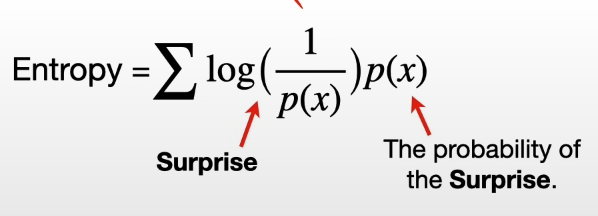

## Shannon

Esta ecuación se puede convertir en la ecuación de entropía que Claude Shannon público en 1948. 
Así mismo, para entender mejor el concepto de entropía, se encontró el siguiente texto 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6117159/#:~:text=A.,varies%20at%20each%20time%20step, el cual afirma que la entropía cuantifica la información como la incertidumbre promedio sobre los resultados de la variable: si todas las observaciones de la variable toman el mismo valor, no hay incertidumbre y la entropía es cero; si, por el contrario, la variable toma diferentes valores todos con la misma probabilidad de ocurrencia, la entropía es máxima y refleja la máxima incertidumbre.
Teniendo en cuenta lo anterior, se buscó implementaciones para aplicar la entropía de Shannon en python. Se encontró, que con SciPy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html) se pude hacer uso de la entropía de Shannon, y también describe otros dos tipos de entropía, “relative entropy” y “cross entropy”.

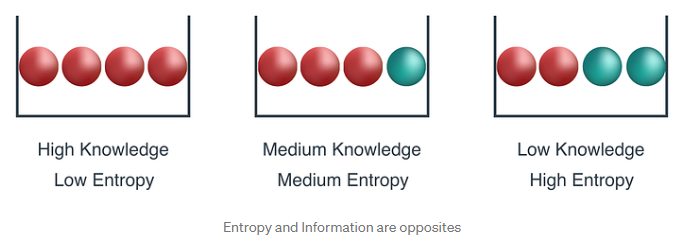
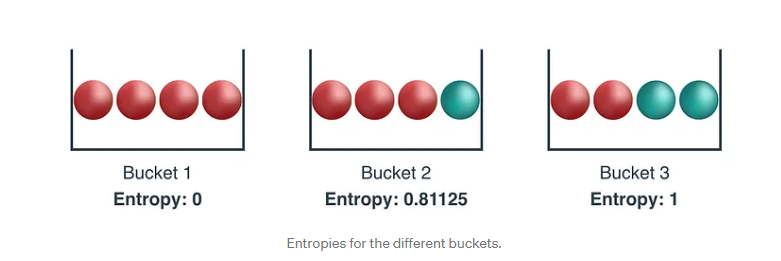


## Permutation entropy

Permutation entropy (PE) is an ordinal-based non-parametric complexity measure for studying the temporal dependence structure in a linear or non-linear time series.

Hence, Bandt & Pompe (2002) proposed permutation entropy (PE) as a more robust and data-driven way to construct the probability distribution required for the computation of entropy.

Se encontro unas librerias que permiten implementar esta entropia en Python en el siguiente link: https://raphaelvallat.com/antropy/build/html/index.html

## Spectral Entropy

Spectral entropy combines the idea of FFT, spectral density, and Shannon entropy. We can use it to check how much info contains in a window of time series data. Higher entropy implies uncertainty and randomness. Lower entropy indicates regular and deterministic patterns.

the rolling spectral entropy will be closed to zero for all the anomaly regions. We can use the rolling entropy as a continuous anomaly score indicating the likelihood of anomaly.

Suppose we study how people spend their spare time. One spends 90% on soccer. The other spends 90% on chess. Although their interests are different, it is almost certain that they will dedicate their spare time to their favourite hobbies. They are similar to some degree. This similarity is entropy. They will have the same lower entropy, implying lower uncertainty.

Another person spends 20% on hiking, 30% on reading, 20% on movies, and 30 % on whatever. Apparently, the third person is different from the first two. We don’t know which activity the third is doing exactly. In this case, the entropy is high, meaning a higher uncertainty.

## Singular value decomposition entropy

SVD entropy is an indicator of the number of eigenvectors that are needed
for an adequate explanation of the data set. In other words, it measures
the dimensionality of the data.

The Singular value decomposition entropy (SvdEn) characterizes information content or regularity of a signal depending on the number of vectors attributed to the process.